## Random Forest


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
spotify = pd.read_csv('../Data/spotify_encoded.csv', index_col='track_id')
spotify.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
track_id,,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,1.964615,-0.004759,-0.309921,0.648283,-0.678397,-1.205833,0.350223,-1.306583,0.448128,-0.868312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4qPNDBW1i3p13qLCt0Ki3A,1.040813,-0.692843,-0.309921,-0.781882,-1.818618,-1.205833,-1.616854,0.765355,-0.117369,1.756407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1iJBSr7s7jYXzM8EGcbK5b,1.143458,-0.173180,-0.309921,-0.681324,-1.072643,-1.486792,-0.210138,0.765355,-0.292021,-0.345016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6lfxq3CG4xtTiEg7opyCyx,1.861970,-0.248673,-0.309921,-1.642216,-2.229870,-1.486792,-1.856901,0.765355,-0.456498,1.700487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5vjLSffimiIP26QG5WcN2K,2.426516,-0.274819,-0.309921,0.324261,-0.747970,-0.924873,-0.200198,0.765355,-0.318303,0.417265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = spotify.drop(['popularity'], axis=1)
y = spotify['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('Training Set Metrics:')
print(f'MSE: {mse_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')
print(f'MAE: {mae_train:.4f}')
print(f'R2: {r2_train:.4f}')
print()

print('Testing Set Metrics:')
print(f'MSE: {mse_test:.4f}')
print(f'RMSE: {rmse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'R2: {r2_test:.4f}')

Training Set Metrics:
MSE: 0.0856
RMSE: 0.2927
MAE: 0.2001
R2: 0.9141

Testing Set Metrics:
MSE: 0.6167
RMSE: 0.7853
MAE: 0.5478
R2: 0.3886


In [11]:
feat_importance = pd.DataFrame({'Feature Name':spotify.columns.drop('popularity'),'Importance':rf.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
feat_importance

,Feature Name,Importance
9,instrumentalness,0.063452
8,acousticness,0.057351
0,duration_ms,0.056822
5,loudness,0.055815
7,speechiness,0.055665
...,...,...
49,track_genre_forro,0.000216
103,track_genre_reggaeton,0.000170
77,track_genre_j-rock,0.000162
43,track_genre_dubstep,0.000141


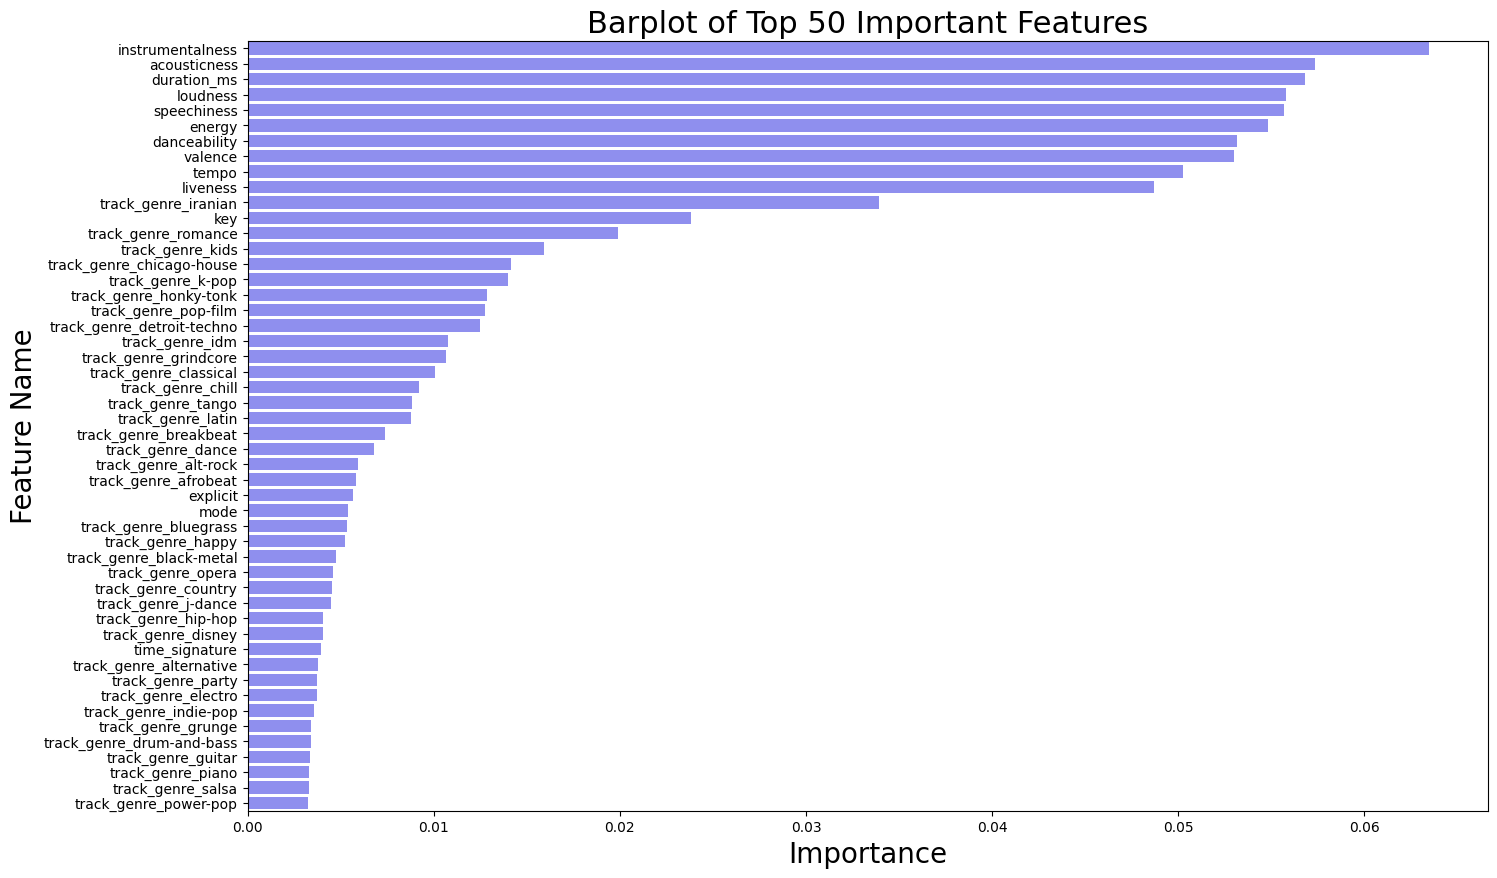

In [31]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=feat_importance['Importance'][:50], y=feat_importance['Feature Name'][:50],color='blue', alpha=0.5)
ax.tick_params(labelsize=10)
ax.set_ylabel('Feature Name', fontsize = 20)
ax.set_xlabel('Importance', fontsize = 20)
ax.set_title('Barplot of Top 50 Important Features', fontsize=22)
plt.show()

In [25]:
n_trees = [10, 50, 100, 500]

for n in n_trees:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{n} Decision Trees:')
    print(f'Mean Square Error: {mse:.4f}')
    print(f'R2 Error: {r2:.4f}')
    print()

KeyboardInterrupt: 